# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends based on dataset:

1. As you get closer to the equator temperature rises, the temperature drops the farther away you travel. 

2. Wind Speed increases slightly as you travel away from the equator.

3. Humidity and Cloudiness do not show much of a correlation to Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys_2 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Define URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Repalce spaces with %20 to create URL
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
lat_lng_list = list(lat_lngs)
print(len(cities)) 

637


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Start counter 
j = 1

#Loop through the cities in the city list 
for city in cities: 
    
    
    #Try statement to append calls where value is found 
    try: 
        
        #Define response
        response = requests.get(f"{url}&q={city}").json()
        city_record = response["name"]
    
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {j} | {city_record}")
        
        #Increase counter by one 
        j = j + 1
        
    #If no record skip to next
    except:
        print("City not found... Skipping.")
    continue


Processing Record 1 | Berlare
Processing Record 2 | Verkhoyansk
City not found... Skipping.
City not found... Skipping.
Processing Record 3 | Longyearbyen
Processing Record 4 | Nogales
Processing Record 5 | São Miguel
Processing Record 6 | Itarema
Processing Record 7 | Progreso
Processing Record 8 | Yamada
Processing Record 9 | Yellowknife
Processing Record 10 | Albany
Processing Record 11 | Manicoré
Processing Record 12 | Hermanus
Processing Record 13 | Kamaishi
City not found... Skipping.
Processing Record 14 | Carbonia
Processing Record 15 | Tasiilaq
Processing Record 16 | Busselton
Processing Record 17 | Mar del Plata
Processing Record 18 | Bambous Virieux
Processing Record 19 | Butaritari
Processing Record 20 | Ternate
Processing Record 21 | Bathsheba
Processing Record 22 | Chokurdakh
Processing Record 23 | Constitución
Processing Record 24 | Castro
Processing Record 25 | Tiksi
Processing Record 26 | Nome
Processing Record 27 | Port Lincoln
Processing Record 28 | Punta Arenas
Proc

Processing Record 230 | Upernavik
Processing Record 231 | Saldanha
Processing Record 232 | Cherskiy
Processing Record 233 | Saint-Philippe
Processing Record 234 | Nānākuli
Processing Record 235 | Velikiy Ustyug
Processing Record 236 | Lavrentiya
Processing Record 237 | Pyshchug
Processing Record 238 | Mahébourg
Processing Record 239 | Salalah
Processing Record 240 | Poddor'ye
Processing Record 241 | Mareeba
Processing Record 242 | Berlevåg
Processing Record 243 | Cabo San Lucas
Processing Record 244 | Surab
Processing Record 245 | Nouadhibou
Processing Record 246 | New Albany
Processing Record 247 | Lhokseumawe
Processing Record 248 | Leshukonskoye
Processing Record 249 | Sept-Îles
Processing Record 250 | Souillac
Processing Record 251 | Bandarbeyla
Processing Record 252 | Ranong
Processing Record 253 | Los Llanos de Aridane
Processing Record 254 | Gīdolē
Processing Record 255 | Carutapera
Processing Record 256 | Sørland
Processing Record 257 | Lebu
Processing Record 258 | Dahuk
Proces

Processing Record 461 | Laguna
City not found... Skipping.
City not found... Skipping.
Processing Record 462 | Alugan
Processing Record 463 | Banganapalle
Processing Record 464 | Luanda
City not found... Skipping.
Processing Record 465 | Najrān
Processing Record 466 | Vaasa
Processing Record 467 | Tara
Processing Record 468 | Mopipi
Processing Record 469 | Dahra
Processing Record 470 | Copperas Cove
Processing Record 471 | Hurghada
City not found... Skipping.
Processing Record 472 | Grand-Lahou
Processing Record 473 | Morgantown
Processing Record 474 | Opuwo
Processing Record 475 | Te Anau
Processing Record 476 | Oddur
Processing Record 477 | Ciudad General Terán
Processing Record 478 | Cloquet
Processing Record 479 | Sterling
Processing Record 480 | Shelburne
Processing Record 481 | Kysyl-Syr
Processing Record 482 | Aboisso
Processing Record 483 | Bonnyville
Processing Record 484 | Aklavik
Processing Record 485 | Rāmgarh
Processing Record 486 | Fasa
City not found... Skipping.
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create DF
city_df = pd.DataFrame({"City": city_name,
                       "Cloudiness": cloudiness,
                       "Country": country,
                       "Date": date,
                       "Humidity": humidity,
                       "Latitude": lat,
                       "Longitude": lng,
                       "Max Temp": max_temp,
                       "Wind Speed": wind_speed})

#Rename index to 'City ID'
city_df = city_df.rename_axis("City ID")

#Export Data to CSV
city_df.to_csv("../output_data/city.csv")

#Display DF
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Berlare,99,BE,1603168604,88,51.04,3.98,53.01,4.00
1,Verkhoyansk,100,RU,1603168604,90,67.54,133.38,14.92,3.53
2,Longyearbyen,75,SJ,1603168405,68,78.22,15.64,26.60,3.36
3,Nogales,1,MX,1603168473,22,31.31,-110.94,66.00,5.82
4,São Miguel,40,BR,1603168605,88,-5.47,-35.37,73.40,4.70


In [6]:
city_df.count()

City          587
Cloudiness    587
Country       587
Date          587
Humidity      587
Latitude      587
Longitude     587
Max Temp      587
Wind Speed    587
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

- No Cities with Humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Humidity Plot

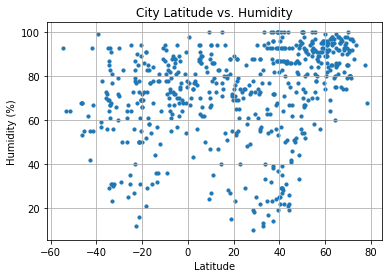

In [7]:
#Build Scatter Plot
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o", s = 10)

#Set Labels and Grid
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("../output_data/humidity_vs_latitude.png")

#Show plot
plt.show()

- This plot shows no real correlation between a city's latitude and it's humidity %.

## Latitude vs. Temperature Plot

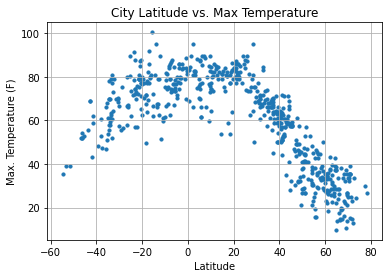

In [8]:
#Build Scatter Plot
plt.scatter(city_df["Latitude"], city_df["Max Temp"], marker = "o", s = 10)

#Set Labels and Grid
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("../output_data/max_temp_vs_latitude.png")

#Show plot
plt.show()

- This plot shows us, for the most part, as you move away from the equator the temperature drops.

## Latitude vs. Cloudiness Plot

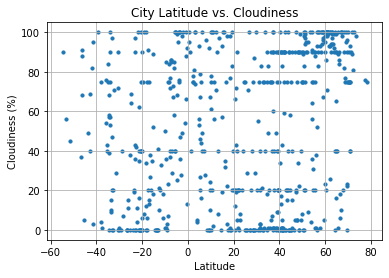

In [9]:
#Build Scatter Plot
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o", s = 10)

#Set Labels and Grid
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("../output_data/cloudiness_vs_latitude.png")

#Show plot
plt.show()

- This plot shows no real correlation between City Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

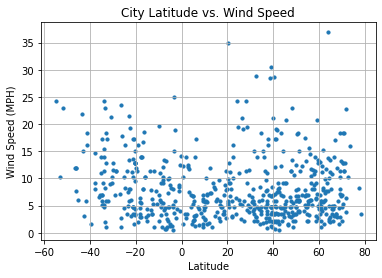

In [10]:
#Build Scatter Plot
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o", s = 10)

#Set Labels and Grid
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure
plt.savefig("../output_data/wind_speed_vs_latitude.png")

#Show plot
plt.show()

- This plot shows no real correlation between City Latitude and Wind Speed.

## Linear Regression

In [11]:
#Create DF for Northern and Southern Hemisphere
northern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) > 0, :]
southern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) < 0, :]


In [12]:
#Function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create Line plot, Add linear regression equation and line to plot, change x label   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")

#Show plot
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

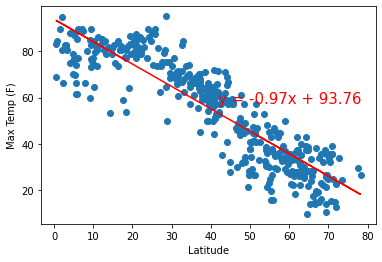

None


<Figure size 432x288 with 0 Axes>

In [13]:
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/NH_max_temp_vs_lat.png")


- The regression line shows us the farther away you live from the equator, the colder the max temperature is.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

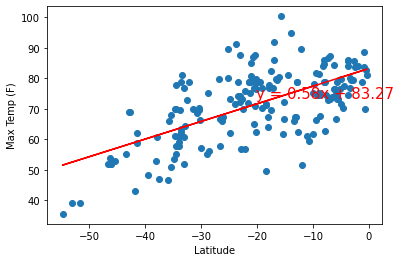

None


<Figure size 432x288 with 0 Axes>

In [14]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/SH_max_temp_vs_lat.png")


- The regression line shows us the closer you live to the equator, the hotter the max temperature is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

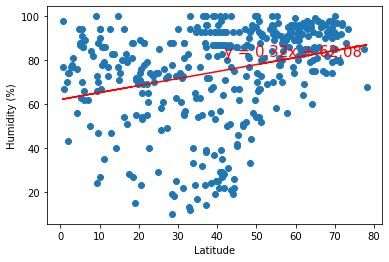

None


<Figure size 432x288 with 0 Axes>

In [15]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/NH_humidity_vs_lat.png")


- The regression line shows no real correlation between humidity and latitue in the northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

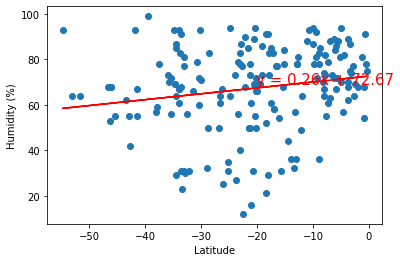

None


<Figure size 432x288 with 0 Axes>

In [16]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/SH_humidity_vs_latitude.png")


- The regression line shows no real correlation between humidity and latitue in the Southern hemisphere. 

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 

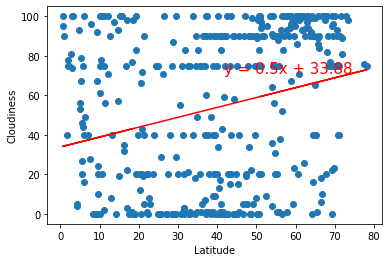

None


<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/NH_cloudiness_vs_latitude.png")


- - The regression line shows no real correlation between cloudiness and latitue in the northern hemisphere. 

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

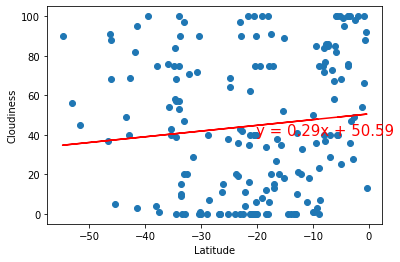

None


<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/SH_cloudiness_vs_latitude.png")


- The regression line shows no real correlation between cloudiness and latitue in the southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

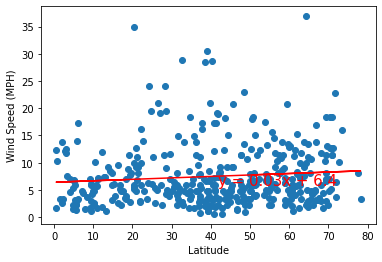

None


<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
plt.ylabel("Wind Speed (MPH)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/NH_wind_speed_vs_latitude.png")


- The regression line shows no real correlation between wind speed and latitue in the northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

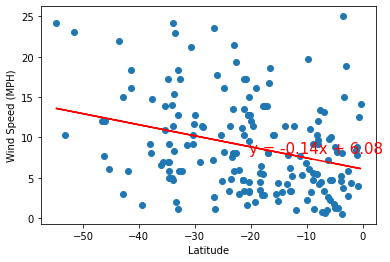

None


<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
plt.ylabel("Wind Speed (MPH)")
print(linear_reg_plot(x_values,y_values))
plt.savefig("../output_data/SH_wind_speed_vs_latitude.png")


- The regression line shows no real correlation between wind speed and latitue in the southern hemisphere. 